In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from pyearth import Earth ###can't get this to load. 

from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score as EV
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

In [3]:
file = "Data/forestfires.csv"
fire = pd.read_csv(file)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
X = pd.get_dummies(fire.drop(columns = ['day', "area"]))
y = np.log(fire["area"] + 0.001)
X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2, random_state = 5)

In [5]:
#Scale data
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

---------------------------------------

Model: relu 
Layers: 7 
Size: (25, 25, 25, 25, 25) 
MSE: 31.700048221046224
R^2 Score: -0.7
Explained Variace: -0.69
Mean Absolute Error: 4.35


---------------------------------------

Model: logistic 
Layers: 7 
Size: (25, 25, 25, 25, 25) 
MSE: 18.874490494947004
R^2 Score: -0.01
Explained Variace: 0.0
Mean Absolute Error: 4.19


---------------------------------------

Model: tanh 
Layers: 7 
Size: (25, 25, 25, 25, 25) 
MSE: 20.905385287460447
R^2 Score: -0.12
Explained Variace: -0.11
Mean Absolute Error: 3.78


---------------------------------------

Model: relu 
Layers: 5 
Size: (100, 100, 100) 
MSE: 25.539196474498638
R^2 Score: -0.37
Explained Variace: -0.33
Mean Absolute Error: 3.86


---------------------------------------

Model: logistic 
Layers: 5 
Size: (100, 100, 100) 
MSE: 19.036369686861672
R^2 Score: -0.02
Explained Variace: 0.0
Mean Absolute Error: 4.11


---------------------------------------

Model: tanh 
Layers: 5 
Size: (

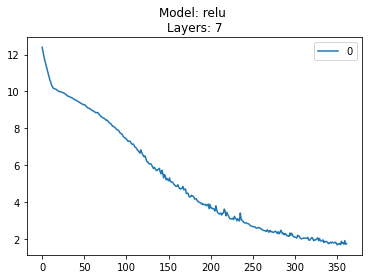

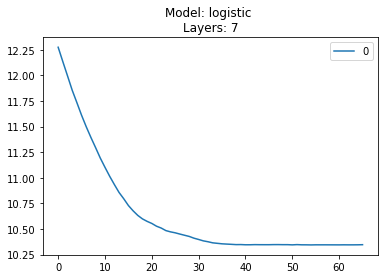

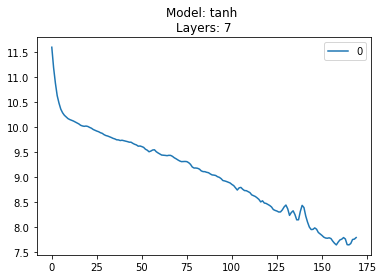

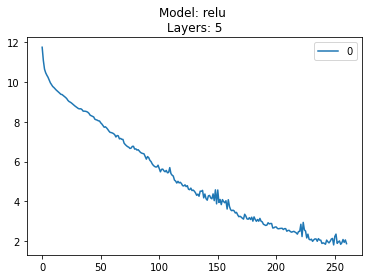

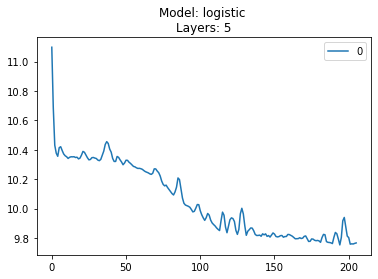

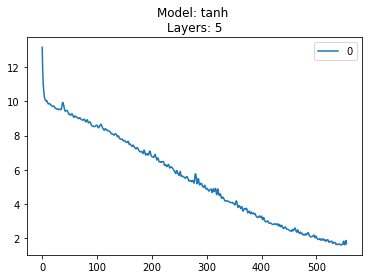

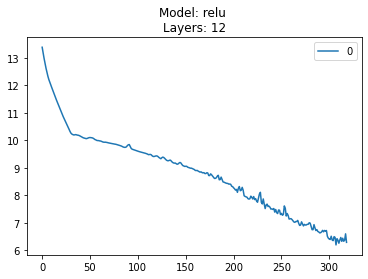

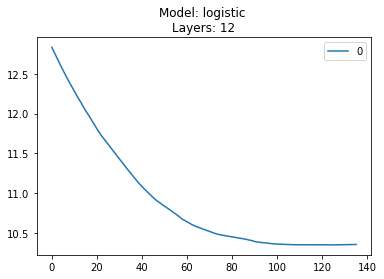

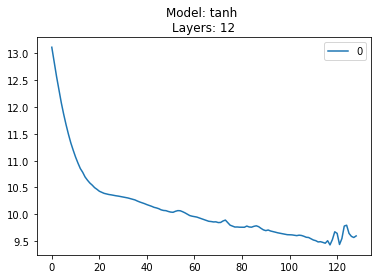

In [6]:
sizes = [(25,25,25,25,25), (100,100,100), (10,10,10,10,10,10,10,10,10,10)]
for s in sizes:
    reg_r = MLPRegressor(hidden_layer_sizes=s,activation="relu" ,random_state=1, 
                       max_iter=2000).fit(X_trainscaled, y_train)

    reg_s = MLPRegressor(hidden_layer_sizes=s,activation="logistic" ,random_state=1, 
                       max_iter=2000).fit(X_trainscaled, y_train)

    reg_t = MLPRegressor(hidden_layer_sizes=s,activation="tanh" ,random_state=1, 
                       max_iter=2000).fit(X_trainscaled, y_train)
    reg = [reg_r, reg_s, reg_t]
    for r in reg:
        y_pred=r.predict(X_testscaled)
        print("---------------------------------------")
        print(f"\nModel: {r.activation} \nLayers: {r.n_layers_} \nSize: {s} \nMSE: {MSE(y_test, y_pred)}\nR^2 Score: {round(r2_score(y_test, y_pred), 2)}\nExplained Variace: {round(EV(y_test, y_pred),2)}\nMean Absolute Error: {round(MAE(y_test, y_pred),2)}")
        pd.DataFrame(r.loss_curve_).plot(title = f"Model: {r.activation} \nLayers: {r.n_layers_}")
        print("\n")

In [124]:
#MARS Models
model = Earth()
model.fit(X_trainscaled,y_train)
print(model.trace())
print(model.summary())

NameError: name 'Earth' is not defined